In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from glob import glob
from skimage.io import imread
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

print(tf.__version__)

Using TensorFlow backend.


1.13.1


In [2]:
base_skin_dir = os.path.join('', 'input')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
8139,HAM_0003525,ISIC_0024653,nv,histo,60.0,female,trunk,input/Ham10000_images_resize_part_1/ISIC_00246...,Melanocytic nevi,4
9122,HAM_0006104,ISIC_0030663,nv,histo,30.0,male,back,input/Ham10000_images_resize_part_1/ISIC_00306...,Melanocytic nevi,4
2720,HAM_0002312,ISIC_0029083,bcc,histo,70.0,male,face,input/Ham10000_images_resize_part_1/ISIC_00290...,Basal cell carcinoma,1
2931,HAM_0004621,ISIC_0028122,bcc,histo,70.0,female,back,input/Ham10000_images_resize_part_1/ISIC_00281...,Basal cell carcinoma,1
3837,HAM_0004629,ISIC_0027019,nv,follow_up,45.0,female,abdomen,input/Ham10000_images_resize_part_1/ISIC_00270...,Melanocytic nevi,4
3968,HAM_0002035,ISIC_0024989,nv,follow_up,45.0,female,upper extremity,input/Ham10000_images_resize_part_1/ISIC_00249...,Melanocytic nevi,4
9169,HAM_0004095,ISIC_0026017,nv,histo,65.0,male,back,input/Ham10000_images_resize_part_1/ISIC_00260...,Melanocytic nevi,4
2865,HAM_0003669,ISIC_0030096,bcc,histo,65.0,male,chest,input/Ham10000_images_resize_part_1/ISIC_00300...,Basal cell carcinoma,1
4622,HAM_0006710,ISIC_0028324,nv,follow_up,45.0,male,trunk,input/Ham10000_images_resize_part_1/ISIC_00283...,Melanocytic nevi,4
197,HAM_0002327,ISIC_0032883,bkl,histo,60.0,female,neck,input/Ham10000_images_resize_part_1/ISIC_00328...,Benign keratosis-like lesions,2


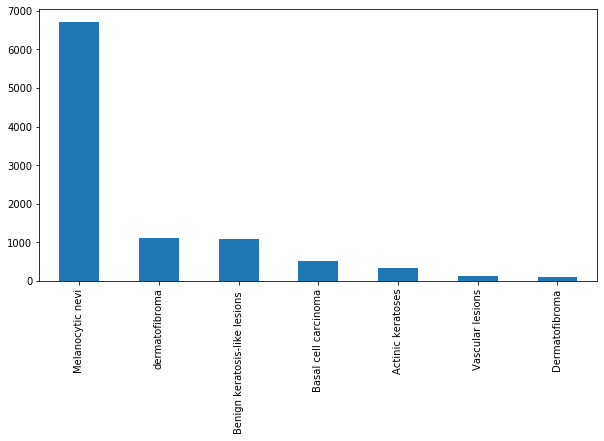

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [4]:
df['image'] = df['path'].map(imread)

In [5]:
#Selecting columns
features = df.drop(columns=['cell_type_idx'],axis=1)
target = df['cell_type_idx']

features.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,image
6818,HAM_0002670,ISIC_0030426,nv,histo,75.0,male,back,input/Ham10000_images_resize_part_1/ISIC_00304...,Melanocytic nevi,"[[[164, 139, 161], [164, 139, 161], [164, 139,..."
1838,HAM_0001344,ISIC_0032687,mel,histo,45.0,male,back,input/Ham10000_images_resize_part_1/ISIC_00326...,dermatofibroma,"[[[0, 2, 0], [0, 2, 0], [0, 1, 0], [0, 0, 0], ..."
577,HAM_0006327,ISIC_0029585,bkl,histo,85.0,female,face,input/Ham10000_images_resize_part_1/ISIC_00295...,Benign keratosis-like lesions,"[[[185, 152, 173], [190, 157, 178], [194, 161,..."
1868,HAM_0005681,ISIC_0027234,mel,histo,65.0,male,upper extremity,input/Ham10000_images_resize_part_1/ISIC_00272...,dermatofibroma,"[[[10, 6, 21], [8, 4, 18], [6, 3, 14], [4, 3, ..."
6095,HAM_0005944,ISIC_0030850,nv,follow_up,45.0,male,abdomen,input/Ham10000_images_resize_part_1/ISIC_00308...,Melanocytic nevi,"[[[240, 163, 179], [240, 163, 179], [241, 163,..."


In [6]:
#Splitting data
x_training, x_test, y_training, y_test = train_test_split(features, target, test_size=0.20, random_state=1234)
x_train, x_validate, y_train, y_validate = train_test_split(x_training, y_training, test_size=0.20, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)
print(y_train.shape)
print(y_test.shape)
print(y_validate.shape)

(6409, 10)
(2003, 10)
(1603, 10)
(6409,)
(2003,)
(1603,)


In [7]:
#convert data to array
X_train = np.asarray(x_train['image'].tolist())
X_validate = np.asarray(x_validate['image'].tolist())
X_test = np.asarray(x_test['image'].tolist())

In [8]:
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [9]:
#Encode target values
Y_train = to_categorical(y_train, num_classes=7)
Y_validate = to_categorical(y_validate, num_classes=7)
Y_test = to_categorical(y_test, num_classes=7)

print(Y_train.shape)
print(Y_validate.shape)
print(Y_test.shape)

(6409, 7)
(1603, 7)
(2003, 7)


In [10]:
#create generator to standardize images
datagen = ImageDataGenerator(
    featurewise_std_normalization=True,
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False
)
#calculate mean and std on training dataset
datagen.fit(X_train)

/Users/henryrodriguez/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [12]:
#prepare an iterators to standardize images
train_iterator = datagen.flow(X_train, Y_train, batch_size = 32)
val_iterator = datagen.flow(X_validate, Y_validate, batch_size = 32)
test_iterator = datagen.flow(X_test, Y_test, batch_size = 32)

In [14]:
#build base model
width, height, channels = X_train.shape[1], X_train.shape[2], X_train.shape[3]

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='Same', input_shape=(width, height, channels)),
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='Same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='Same'),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='Same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.40),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
history = model.fit_generator(
    train_iterator,
    steps_per_epoch=len(train_iterator),
    epochs = 20,
    validation_data=val_iterator,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
51/51 [==============================] - 32s 625ms/step - loss: 0.9400 - acc: 0.6694
 - 505s - loss: 1.0486 - acc: 0.6616 - val_loss: 0.9400 - val_acc: 0.6694
Epoch 2/20
51/51 [==============================] - 33s 650ms/step - loss: 0.9115 - acc: 0.6687
 - 500s - loss: 0.9310 - acc: 0.6726 - val_loss: 0.9115 - val_acc: 0.6687
Epoch 3/20
51/51 [==============================] - 32s 623ms/step - loss: 0.8502 - acc: 0.6706
 - 503s - loss: 0.8918 - acc: 0.6798 - val_loss: 0.8502 - val_acc: 0.6706
Epoch 4/20
51/51 [==============================] - 31s 604ms/step - loss: 0.7942 - acc: 0.6856
 - 491s - loss: 0.8684 - acc: 0.6865 - val_loss: 0.7942 - val_acc: 0.6856
Epoch 5/20
51/51 [==============================] - 32s 628ms/step - loss: 0.7799 - acc: 0.6900
 - 493s - loss: 0.8414 - acc: 0.6915 - val_loss: 0.7799 - val_acc: 0.6900
Epoch 6/20
51/51 [==============================] - 31s 610ms/step - loss: 0.8989 - acc: 0.7155
 - 493

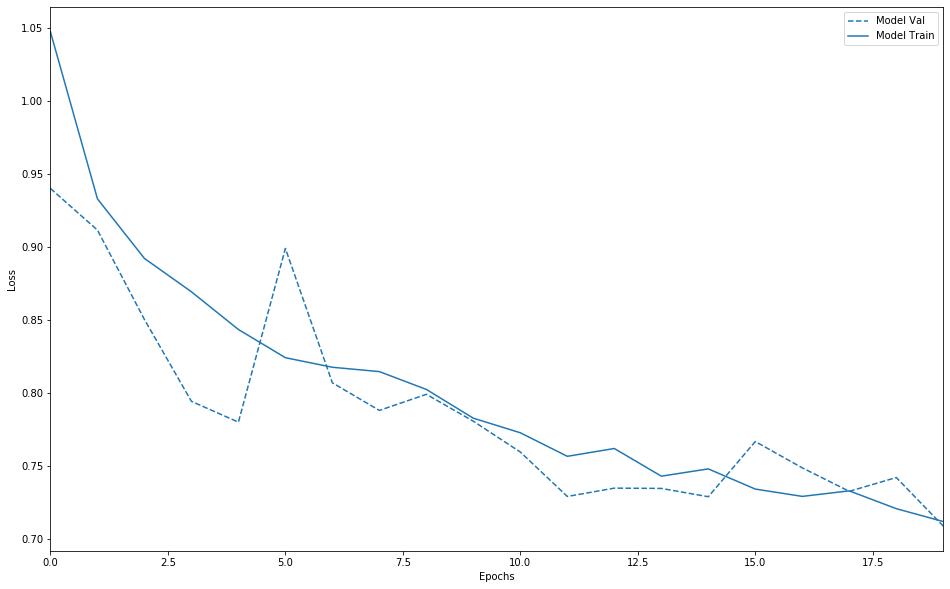

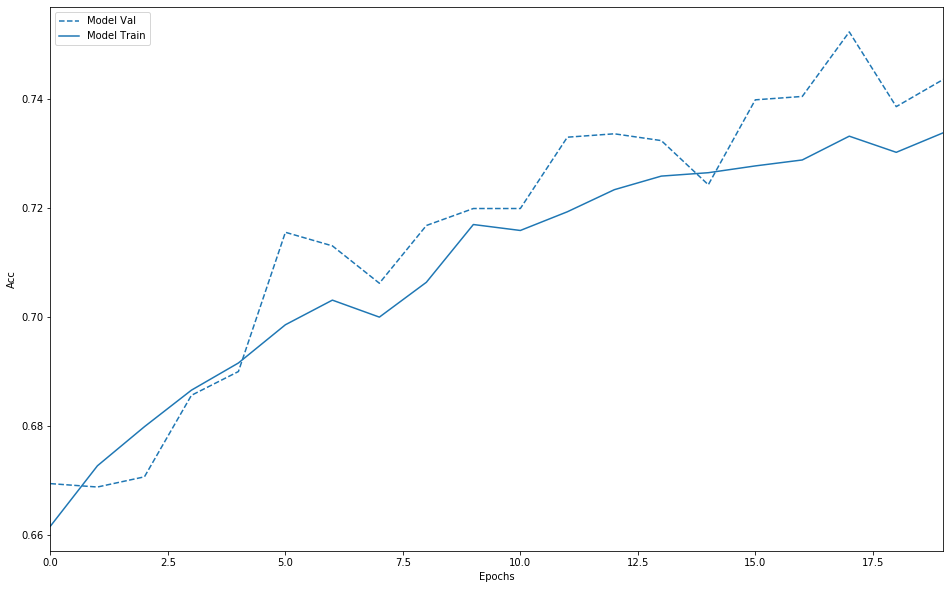

In [17]:
def plot_history(histories, key='acc', title="performance"):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('-',' ').title())
        plt.legend()
        
        plt.xlim([0,max(history.epoch)])
        plt.savefig(title+'.png')
        
plot_history([('Model', history),
             #('smaller', smaller_history),
             #('bigger', bigger_history),
             ], 
             key='loss', title="augmented_loss_function")

plot_history([('Model', history),
             #('smaller', smaller_history),
             #('bigger', bigger_history),
             ], 
             key='acc', title="augmented_acc_function")

In [18]:
loss, accuracy = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)

print('Test accuracy: %.3f' %(accuracy*100))

Test accuracy: 73.739


In [19]:
import itertools

# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('augmented_confusion_matrix.png')

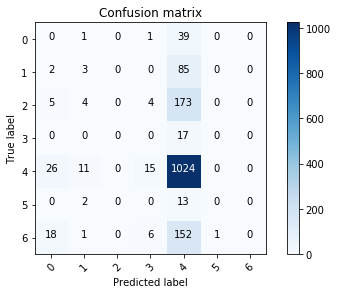

In [21]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

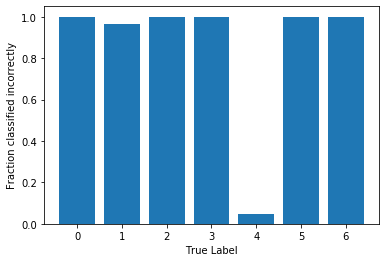

In [23]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')
plt.savefig('Augmented_Fraction_classified_incorrectly.png')